In [22]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
url = 'https://raw.githubusercontent.com/rodmsmendes/reinforcementlearning4fun/master/data/house_prices.csv'
df = pd.read_csv(url)
# plt.scatter(df['area'], df['price'])

In [26]:
df_float = df.select_dtypes(include=['float64']).copy()
df_float.info()
df_float.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrArea   1452 non-null   float64
 2   GarageYrBlt  1379 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB


,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [27]:
df_float['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=False)
df_float['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=False)

In [28]:
df_float['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=False)

In [29]:
df_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1460 non-null   float64
 1   MasVnrArea   1460 non-null   float64
 2   GarageYrBlt  1460 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB


In [32]:
lotFrontage = df_float['LotFrontage'].values.reshape(-1, 1)
salePrice= df['SalePrice'].values



In [33]:
lr1 = LinearRegression()

lr1.fit(lotFrontage, salePrice)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
print(lr1.coef_)
print(lr1.intercept_)
print(mean_squared_error(salePrice, lr1.predict(lotFrontage)))

[1208.0155492]
96299.75696070473
5599428130.969559


In [35]:
masVnrAre = df_float[['MasVnrArea']].values.reshape(-1, 1)
salePrice = df['SalePrice'].values
lr2 = LinearRegression()
lr2.fit(masVnrAre, salePrice)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
print(lr2.coef_)
print(lr2.intercept_)
print(mean_squared_error(salePrice, lr2.predict(masVnrAre)))


[209.08536998]
159242.12458511663
4882373206.33175


In [37]:
garageYrBlt = df_float[['GarageYrBlt']].values.reshape(-1, 1)
salePrice = df['SalePrice'].values
lr3 = LinearRegression()
lr3.fit(garageYrBlt, salePrice)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
print(lr3.coef_)
print(lr3.intercept_)
print(mean_squared_error(salePrice, lr3.predict(garageYrBlt)))

[1556.68774577]
-2898995.104363801
4912566774.814545


<Figure size 640x480 with 0 Axes>

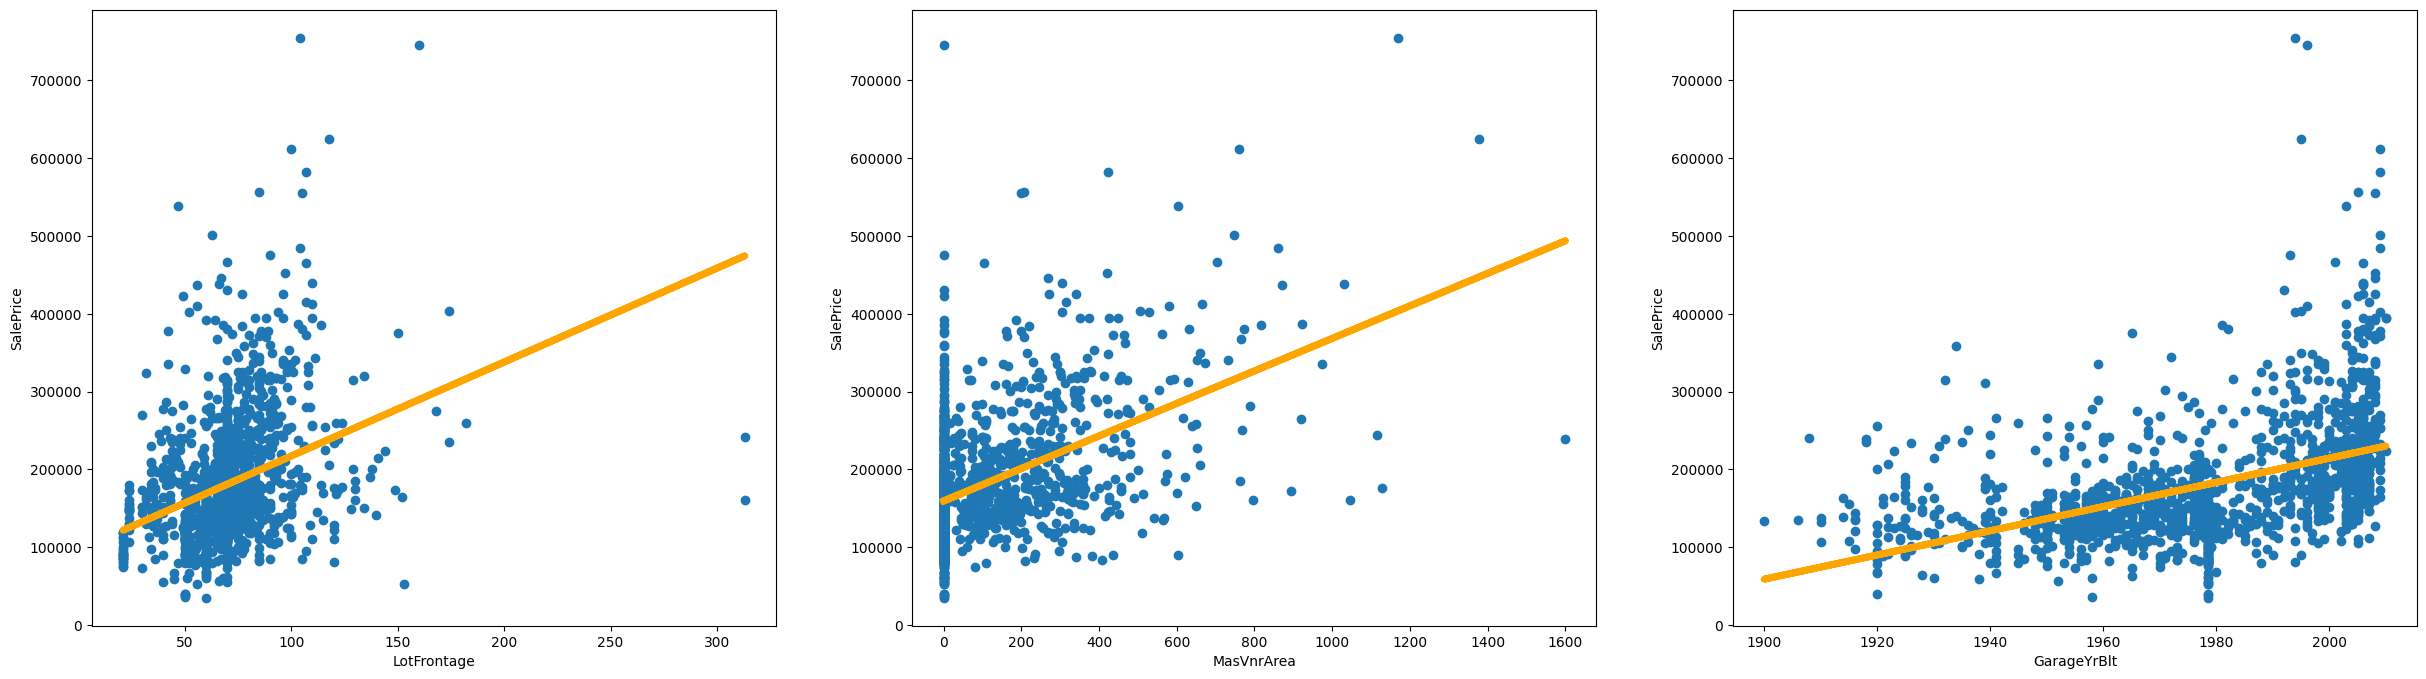

In [39]:
f = plt.figure()
f, ax = plt.subplots(1, 3, figsize=(30, 8))

ax = plt.subplot(1, 3, 1)
plt.ylabel('SalePrice')
plt.xlabel('LotFrontage')
ax = plt.scatter(lotFrontage, salePrice)
ax = plt.plot(lotFrontage, lr1.predict(lotFrontage), linewidth=5.0, color='orange')

ax = plt.subplot(1, 3, 2)
plt.ylabel('SalePrice')
plt.xlabel('MasVnrArea')
ax = plt.scatter(masVnrAre, salePrice)
ax = plt.plot(masVnrAre, lr2.predict(masVnrAre), linewidth=5.0, color='orange')

ax = plt.subplot(1, 3, 3)
plt.ylabel('SalePrice')
plt.xlabel('GarageYrBlt')
ax = plt.scatter(garageYrBlt, salePrice)
ax = plt.plot(garageYrBlt, lr3.predict(garageYrBlt), linewidth=5.0, color='orange')

ax = plt.show()